This is where our journey begin and we will import all the required libraries

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

Now we will take data set as input

In [92]:
training_set_features = pd.read_csv('Desktop/SA/training_set_features.csv')
training_set_labels = pd.read_csv('Desktop/SA/training_set_labels.csv')
test_set_features = pd.read_csv('Desktop/SA/test_set_features.csv')

In [93]:
training_set_features.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [94]:
test_set_features.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

I have dropped the columns which I feel wont be necessary for evaluation

In [95]:
training_set_features = training_set_features.drop(columns = ['health_insurance',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'])

In [96]:
test_set_features = test_set_features.drop(columns = ['health_insurance',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'])

This is the initial missing value graph

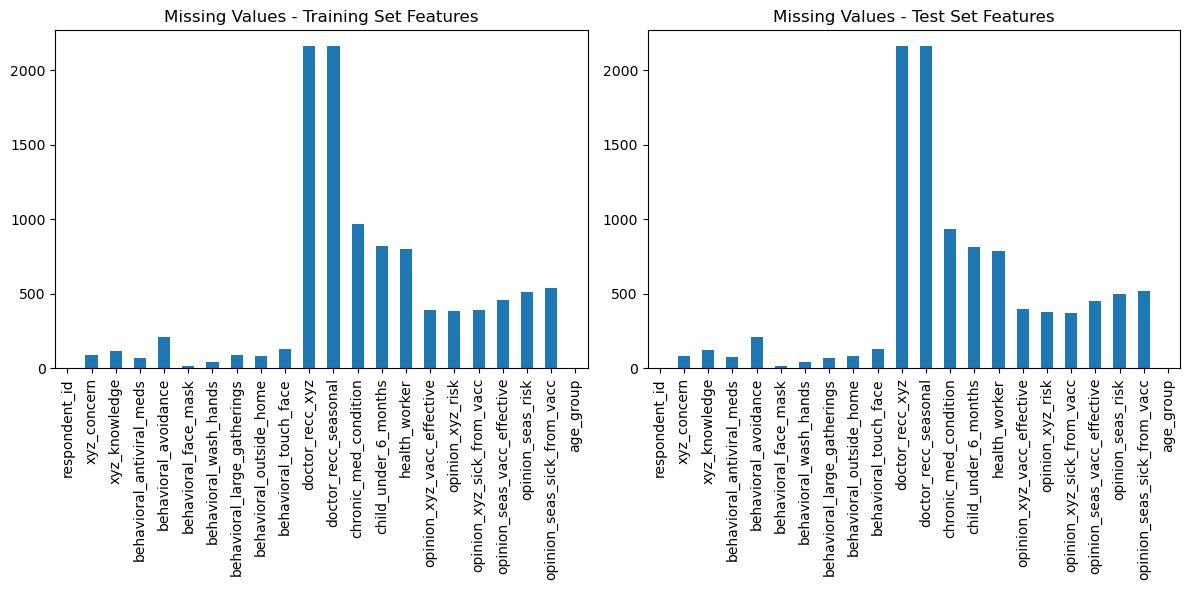

In [97]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Missing Values - Training Set Features')
training_set_features.isnull().sum().plot(kind='bar')
plt.subplot(1, 2, 2)
plt.title('Missing Values - Test Set Features')
test_set_features.isnull().sum().plot(kind='bar')
plt.tight_layout()
plt.show()

In [98]:
training_set_features.isnull().sum()

respondent_id                     0
xyz_concern                      92
xyz_knowledge                   116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_xyz_vacc_effective      391
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
dtype: int64

In [99]:
test_set_features.isnull().sum()

respondent_id                     0
xyz_concern                      85
xyz_knowledge                   122
behavioral_antiviral_meds        79
behavioral_avoidance            213
behavioral_face_mask             19
behavioral_wash_hands            40
behavioral_large_gatherings      72
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           932
child_under_6_months            813
health_worker                   789
opinion_xyz_vacc_effective      398
opinion_xyz_risk                380
opinion_xyz_sick_from_vacc      375
opinion_seas_vacc_effective     452
opinion_seas_risk               499
opinion_seas_sick_from_vacc     521
age_group                         0
dtype: int64

Now I have tried to deal with the missing values

In [100]:
#dealing with null values - mode wala approach 
#xyz_concern
mode_concern = training_set_features['xyz_concern'].mode()[0]
training_set_features['xyz_concern'].fillna(mode_concern, inplace=True)
#xyz_knowledge
mode_knowledge = training_set_features['xyz_knowledge'].mode()[0]
training_set_features['xyz_knowledge'].fillna(mode_knowledge, inplace=True)
#behavioral_antiviral_meds
mode_behavioral_antiviral_meds = training_set_features['behavioral_antiviral_meds'].mode()[0]
training_set_features['behavioral_antiviral_meds'].fillna(mode_behavioral_antiviral_meds, inplace=True)
#behavioral_avoidance
mode_behavioral_avoidance = training_set_features['behavioral_avoidance'].mode()[0]
training_set_features['behavioral_avoidance'].fillna(mode_behavioral_avoidance, inplace=True)
#behavioral_face_mask
mode_behavioral_face_mask = training_set_features['behavioral_face_mask'].mode()[0]
training_set_features['behavioral_face_mask'].fillna(mode_behavioral_face_mask, inplace=True)
#behavioral_wash_hands
mode_behavioral_wash_hands = training_set_features['behavioral_wash_hands'].mode()[0]
training_set_features['behavioral_wash_hands'].fillna(mode_behavioral_wash_hands, inplace=True)
#behavioral_large_gatherings
mode_behavioral_large_gatherings = training_set_features['behavioral_large_gatherings'].mode()[0]
training_set_features['behavioral_large_gatherings'].fillna(mode_behavioral_large_gatherings, inplace=True)
#behavioral_outside_home
mode_behavioral_outside_home = training_set_features['behavioral_outside_home'].mode()[0]
training_set_features['behavioral_outside_home'].fillna(mode_behavioral_outside_home, inplace=True)
#behavioral_touch_face
mode_behavioral_touch_face = training_set_features['behavioral_touch_face'].mode()[0]
training_set_features['behavioral_touch_face'].fillna(mode_behavioral_touch_face, inplace=True)
#chronic_med_condition
mode_chronic_med_condition = training_set_features['chronic_med_condition'].mode()[0]
training_set_features['chronic_med_condition'].fillna(mode_chronic_med_condition, inplace=True)
#child_under_6_months
mode_child_under_6_months = training_set_features['child_under_6_months'].mode()[0]
training_set_features['child_under_6_months'].fillna(mode_child_under_6_months, inplace=True)
#health_worker
mode_health_worker = training_set_features['health_worker'].mode()[0]
training_set_features['health_worker'].fillna(mode_health_worker, inplace=True)
#opinion_xyz_vacc_effective
mode_opinion_xyz_vacc_effective = training_set_features['opinion_xyz_vacc_effective'].mode()[0]
training_set_features['opinion_xyz_vacc_effective'].fillna(mode_opinion_xyz_vacc_effective, inplace=True)
#opinion_xyz_risk
mode_opinion_xyz_risk = training_set_features['opinion_xyz_risk'].mode()[0]
training_set_features['opinion_xyz_risk'].fillna(mode_opinion_xyz_risk, inplace=True)
#opinion_xyz_sick_from_vacc
mode_opinion_xyz_sick_from_vacc = training_set_features['opinion_xyz_sick_from_vacc'].mode()[0]
training_set_features['opinion_xyz_sick_from_vacc'].fillna(mode_opinion_xyz_sick_from_vacc, inplace=True)
#opinion_seas_vacc_effective
mode_opinion_seas_vacc_effective = training_set_features['opinion_seas_vacc_effective'].mode()[0]
training_set_features['opinion_seas_vacc_effective'].fillna(mode_opinion_seas_vacc_effective, inplace=True)
#opinion_seas_risk
mode_opinion_seas_risk = training_set_features['opinion_seas_risk'].mode()[0]
training_set_features['opinion_seas_risk'].fillna(mode_opinion_seas_risk, inplace=True)
#opinion_seas_sick_from_vacc
mode_opinion_seas_sick_from_vacc = training_set_features['opinion_seas_sick_from_vacc'].mode()[0]
training_set_features['opinion_seas_sick_from_vacc'].fillna(mode_opinion_seas_sick_from_vacc, inplace=True)
#doctor_recc_xyz
mode_doctor_recc_xyz = training_set_features['doctor_recc_xyz'].mode()[0]
training_set_features['doctor_recc_xyz'].fillna(mode_doctor_recc_xyz, inplace=True)
#opinion_seas_sick_from_vacc
mode_doctor_recc_seasonal = training_set_features['doctor_recc_seasonal'].mode()[0]
training_set_features['doctor_recc_seasonal'].fillna(mode_doctor_recc_seasonal, inplace=True)

In [101]:
training_set_features.isnull().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
dtype: int64

In [102]:
#dealing with null values - mode wala approach 
#xyz_concern
mode_concern = test_set_features['xyz_concern'].mode()[0]
test_set_features['xyz_concern'].fillna(mode_concern, inplace=True)
#xyz_knowledge
mode_knowledge = test_set_features['xyz_knowledge'].mode()[0]
test_set_features['xyz_knowledge'].fillna(mode_knowledge, inplace=True)
#behavioral_antiviral_meds
mode_behavioral_antiviral_meds = test_set_features['behavioral_antiviral_meds'].mode()[0]
test_set_features['behavioral_antiviral_meds'].fillna(mode_behavioral_antiviral_meds, inplace=True)
#behavioral_avoidance
mode_behavioral_avoidance = test_set_features['behavioral_avoidance'].mode()[0]
test_set_features['behavioral_avoidance'].fillna(mode_behavioral_avoidance, inplace=True)
#behavioral_face_mask
mode_behavioral_face_mask = test_set_features['behavioral_face_mask'].mode()[0]
test_set_features['behavioral_face_mask'].fillna(mode_behavioral_face_mask, inplace=True)
#behavioral_wash_hands
mode_behavioral_wash_hands = test_set_features['behavioral_wash_hands'].mode()[0]
test_set_features['behavioral_wash_hands'].fillna(mode_behavioral_wash_hands, inplace=True)
#behavioral_large_gatherings
mode_behavioral_large_gatherings = test_set_features['behavioral_large_gatherings'].mode()[0]
test_set_features['behavioral_large_gatherings'].fillna(mode_behavioral_large_gatherings, inplace=True)
#behavioral_outside_home
mode_behavioral_outside_home = test_set_features['behavioral_outside_home'].mode()[0]
test_set_features['behavioral_outside_home'].fillna(mode_behavioral_outside_home, inplace=True)
#behavioral_touch_face
mode_behavioral_touch_face = test_set_features['behavioral_touch_face'].mode()[0]
test_set_features['behavioral_touch_face'].fillna(mode_behavioral_touch_face, inplace=True)
#chronic_med_condition
mode_chronic_med_condition = test_set_features['chronic_med_condition'].mode()[0]
test_set_features['chronic_med_condition'].fillna(mode_chronic_med_condition, inplace=True)
#child_under_6_months
mode_child_under_6_months = test_set_features['child_under_6_months'].mode()[0]
test_set_features['child_under_6_months'].fillna(mode_child_under_6_months, inplace=True)
#health_worker
mode_health_worker = test_set_features['health_worker'].mode()[0]
test_set_features['health_worker'].fillna(mode_health_worker, inplace=True)
#opinion_xyz_vacc_effective
mode_opinion_xyz_vacc_effective = test_set_features['opinion_xyz_vacc_effective'].mode()[0]
test_set_features['opinion_xyz_vacc_effective'].fillna(mode_opinion_xyz_vacc_effective, inplace=True)
#opinion_xyz_risk
mode_opinion_xyz_risk = test_set_features['opinion_xyz_risk'].mode()[0]
test_set_features['opinion_xyz_risk'].fillna(mode_opinion_xyz_risk, inplace=True)
#opinion_xyz_sick_from_vacc
mode_opinion_xyz_sick_from_vacc = test_set_features['opinion_xyz_sick_from_vacc'].mode()[0]
test_set_features['opinion_xyz_sick_from_vacc'].fillna(mode_opinion_xyz_sick_from_vacc, inplace=True)
#opinion_seas_vacc_effective
mode_opinion_seas_vacc_effective = test_set_features['opinion_seas_vacc_effective'].mode()[0]
test_set_features['opinion_seas_vacc_effective'].fillna(mode_opinion_seas_vacc_effective, inplace=True)
#opinion_seas_risk
mode_opinion_seas_risk = test_set_features['opinion_seas_risk'].mode()[0]
test_set_features['opinion_seas_risk'].fillna(mode_opinion_seas_risk, inplace=True)
#opinion_seas_sick_from_vacc
mode_opinion_seas_sick_from_vacc = test_set_features['opinion_seas_sick_from_vacc'].mode()[0]
test_set_features['opinion_seas_sick_from_vacc'].fillna(mode_opinion_seas_sick_from_vacc, inplace=True)
#doctor_recc_xyz
mode_doctor_recc_xyz = test_set_features['doctor_recc_xyz'].mode()[0]
test_set_features['doctor_recc_xyz'].fillna(mode_doctor_recc_xyz, inplace=True)
#opinion_seas_sick_from_vacc
mode_doctor_recc_seasonal = test_set_features['doctor_recc_seasonal'].mode()[0]
test_set_features['doctor_recc_seasonal'].fillna(mode_doctor_recc_seasonal, inplace=True)

In [103]:
test_set_features.isnull().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
dtype: int64

Final missing value wala graph

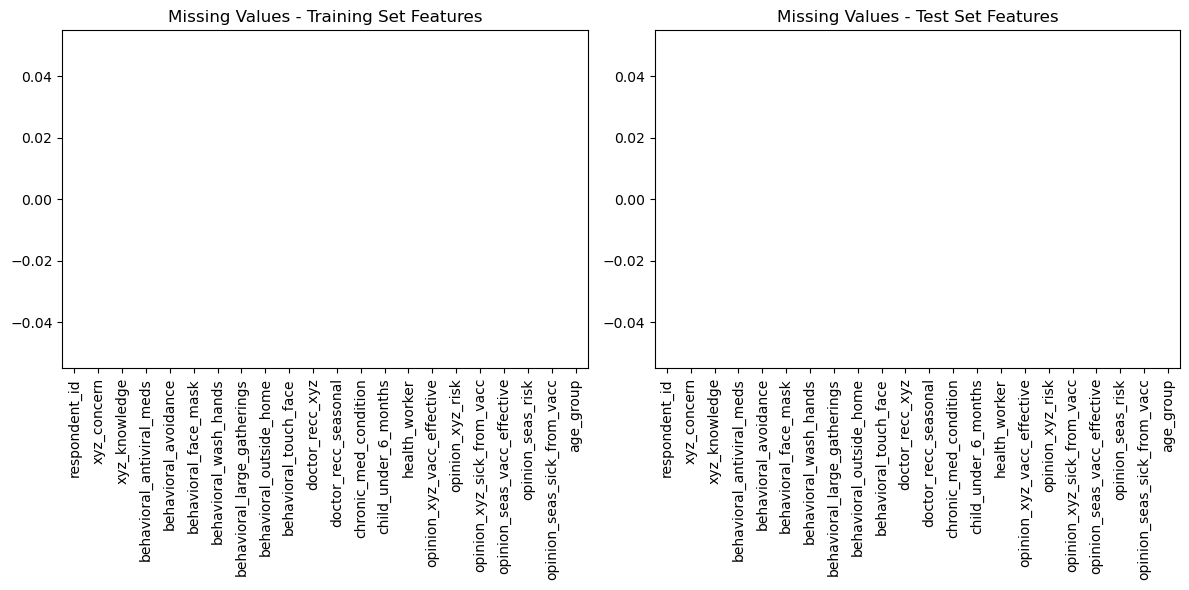

In [104]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Missing Values - Training Set Features')
training_set_features.isnull().sum().plot(kind='bar')
plt.subplot(1, 2, 2)
plt.title('Missing Values - Test Set Features')
test_set_features.isnull().sum().plot(kind='bar')
plt.tight_layout()
plt.show()

This is distribution of different type of vaccines

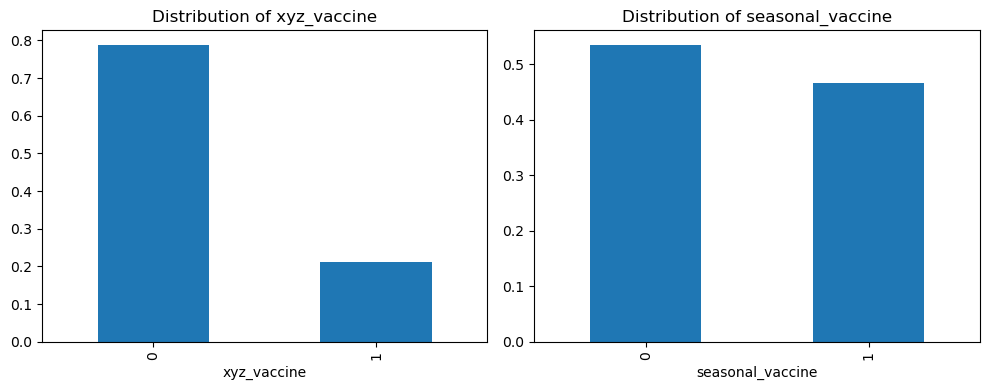

In [105]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Distribution of xyz_vaccine')
training_set_labels['xyz_vaccine'].value_counts(normalize=True).plot(kind='bar')
plt.subplot(1, 2, 2)
plt.title('Distribution of seasonal_vaccine')
training_set_labels['seasonal_vaccine'].value_counts(normalize=True).plot(kind='bar')
plt.tight_layout()
plt.show()

In [106]:
training_set_features = training_set_features.drop(columns=['age_group'])
test_set_features = test_set_features.drop(columns=['age_group'])

Training my logistic regression model (I used this because this is a classification problem and I tried to use svm but its roc-auc was coming 
out to be 0.69 and 0.73 so I dropped that model)

In [107]:
model_xyz = LogisticRegression(max_iter=1000)
model_xyz.fit(training_set_features, training_set_labels['xyz_vaccine'])

LogisticRegression(max_iter=1000)

In [108]:
model_seasonal = LogisticRegression(max_iter=1000)
model_seasonal.fit(training_set_features, training_set_labels['seasonal_vaccine'])

LogisticRegression(max_iter=1000)

In [109]:
xyz_vaccine_probs = model_xyz.predict_proba(test_set_features)[:, 1]

In [110]:
seasonal_vaccine_probs = model_seasonal.predict_proba(test_set_features)[:, 1]

calculating roc-auc

In [111]:
roc_auc_xyz = roc_auc_score(training_set_labels['xyz_vaccine'], model_xyz.predict_proba(training_set_features)[:, 1])

In [112]:
roc_auc_seasonal = roc_auc_score(training_set_labels['seasonal_vaccine'], model_seasonal.predict_proba(training_set_features)[:, 1])

I made the roc-auc curve

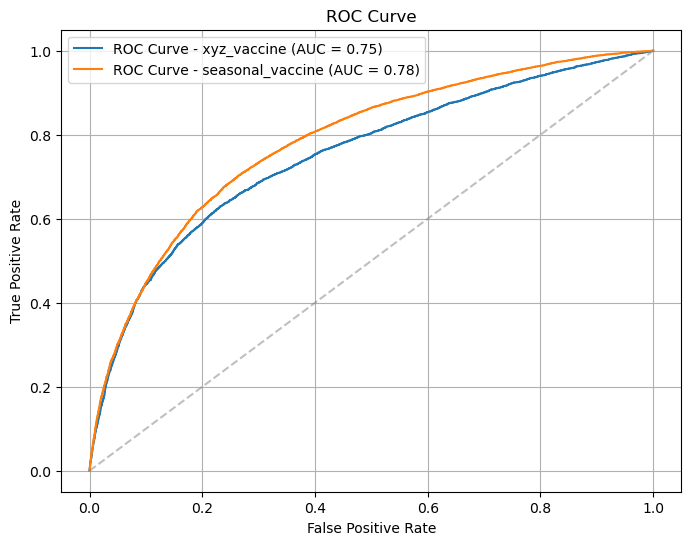

In [113]:
from sklearn.metrics import roc_curve

fpr_xyz, tpr_xyz, _ = roc_curve(training_set_labels['xyz_vaccine'], model_xyz.predict_proba(training_set_features)[:, 1])
fpr_seasonal, tpr_seasonal, _ = roc_curve(training_set_labels['seasonal_vaccine'], model_seasonal.predict_proba(training_set_features)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr_xyz, tpr_xyz, label='ROC Curve - xyz_vaccine (AUC = {:.2f})'.format(roc_auc_xyz))
plt.plot(fpr_seasonal, tpr_seasonal, label='ROC Curve - seasonal_vaccine (AUC = {:.2f})'.format(roc_auc_seasonal))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

I made the confusion matrix

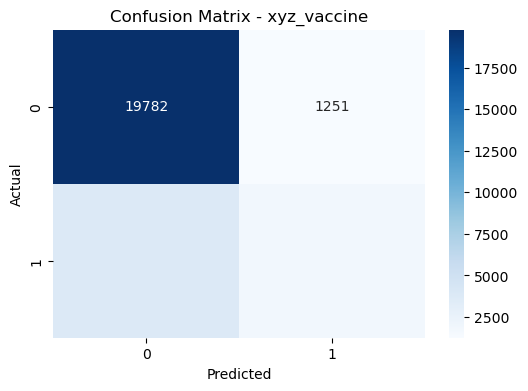

In [114]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Example usage for xyz_vaccine
plot_confusion_matrix(training_set_labels['xyz_vaccine'], model_xyz.predict(training_set_features), [0, 1], 'Confusion Matrix - xyz_vaccine')

I evaluated that which feature holds the most importance in determinig probability

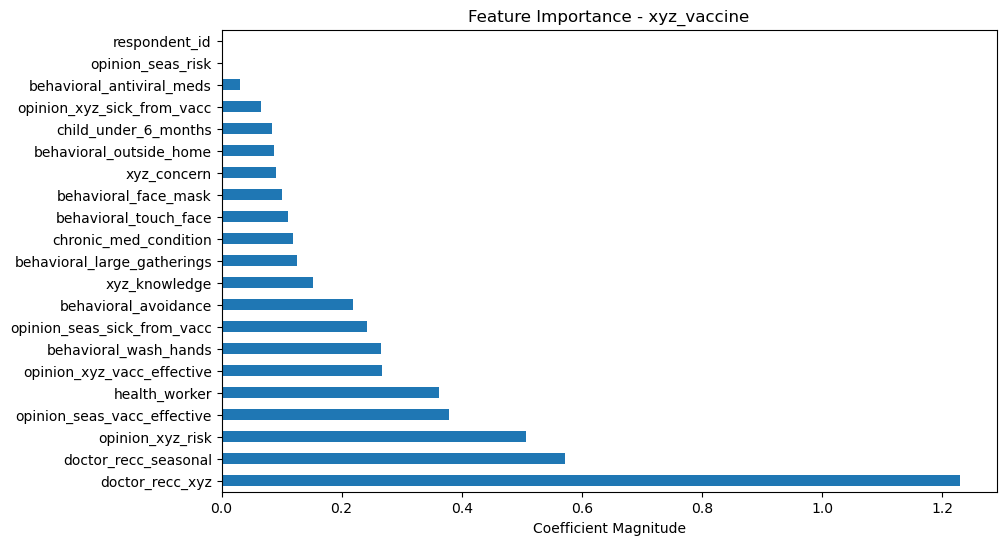

In [115]:
feature_importance = pd.Series(model_xyz.coef_[0], index=training_set_features.columns)
feature_importance_sorted = feature_importance.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance_sorted.plot(kind='barh')
plt.title('Feature Importance - xyz_vaccine')
plt.xlabel('Coefficient Magnitude')
plt.show()

Converging the code into submission format 

In [116]:
submission = pd.DataFrame({
    'respondent_id': test_set_features.index,
    'xyz_vaccine': xyz_vaccine_probs,
    'seasonal_vaccine': seasonal_vaccine_probs
})

In [117]:
submission.to_csv('sub.csv', index=False)